<a href="https://colab.research.google.com/github/cool60334/Kaggle-Practice/blob/main/Kaggle_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 載入資料

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [ ]:
from urllib.request import urlretrieve

url = "https://raw.githubusercontent.com/cool60334/Kaggle-Practice/main/train.csv"
urlretrieve(url, "train.csv")

url = "https://raw.githubusercontent.com/cool60334/Kaggle-Practice/main/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f5827909250>)

In [ ]:
import pandas as pd
traindf = pd.read_csv("train.csv", encoding="utf-8")  # 1460 rows
testdf = pd.read_csv("test.csv", encoding="utf-8")  # 1459 rows

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [ ]:
alldf = pd.concat([traindf, testdf], axis=0, ignore_index=True)
alldf = alldf.drop(["Id", "SalePrice"], axis = 1)

alldf

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

# 補缺失值

## 數值資料

In [ ]:
"""
數值類型資料以中位數填補缺失值
LotFrontage(臨街距離)-486、MasVnrArea(砌築貼面面積)-23、
GarageYrBlt(車庫建造年)-159、GarageCars(車庫可容納車數)-1、
GarageArea(車庫面積)-1
"""

'\n數值類型資料以中位數填補缺失值\nLotFrontage(臨街距離)-486、MasVnrArea(砌築貼面面積)-23、\nGarageYrBlt(車庫建造年)-159、GarageCars(車庫可容納車數)-1、\nGarageArea(車庫面積)-1\n'

In [ ]:
med = alldf.median()
alldf =  alldf.fillna(med)

<ipython-input-7-e821dc88078a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = alldf.median()


## 類別資料

In [ ]:
# 土地使用分區

m = alldf["MSZoning"].value_counts().idxmax()  # 找到最多值的土地使用分區類型
alldf["MSZoning"] = alldf["MSZoning"].fillna(m)

In [ ]:
# 巷弄型態

alldf["Alley"] = alldf["Alley"].fillna("NoAlley")

In [ ]:
# 公共設施

m = alldf["Utilities"].value_counts().idxmax()
alldf["Utilities"] = alldf["Utilities"].fillna(m)

In [ ]:
# 第一層覆蓋物

m = alldf["Exterior1st"].value_counts().idxmax()
alldf["Exterior1st"] = alldf["Exterior1st"].fillna(m)

In [ ]:
# 第二層覆蓋物

m = alldf["Exterior2nd"].value_counts().idxmax()
alldf["Exterior2nd"] = alldf["Exterior2nd"].fillna(m)

In [ ]:
# 砌築貼面型態

m = alldf["MasVnrType"].value_counts().idxmax()
alldf["MasVnrType"] = alldf["MasVnrType"].fillna(m)

In [ ]:
# 地下室高度評價、地下室狀況評分、BsmtExposure、地下室完工類型一、地下室完工類型二

alldf["BsmtQual"] = alldf["BsmtQual"].fillna("NoBsmt")
alldf["BsmtCond"] = alldf["BsmtCond"].fillna("NoBsmt")
alldf["BsmtExposure"] = alldf["BsmtExposure"].fillna("NoBsmt")
alldf["BsmtFinType1"] = alldf["BsmtFinType1"].fillna("NoBsmt")
alldf["BsmtFinType2"] = alldf["BsmtFinType2"].fillna("NoBsmt")

In [ ]:
# 電力系統

m = alldf["Electrical"].value_counts().idxmax()
alldf["Electrical"] = alldf["Electrical"].fillna(m)

In [ ]:
# 廚房品質

m = alldf["KitchenQual"].value_counts().idxmax()
alldf["KitchenQual"] = alldf["KitchenQual"].fillna(m)

In [ ]:
# 家庭功能

m = alldf["Functional"].value_counts().idxmax()
alldf["Functional"] = alldf["Functional"].fillna(m)

In [ ]:
# 壁爐品質

alldf["FireplaceQu"] = alldf["FireplaceQu"].fillna("NoFireplace")

In [ ]:
# 車庫類型、車庫內部裝修、車庫品質、車庫狀況

alldf["GarageType"] = alldf["GarageType"].fillna("NoGarage")
alldf["GarageFinish"] = alldf["GarageFinish"].fillna("NoGarage")
alldf["GarageQual"] = alldf["GarageQual"].fillna("NoGarage")
alldf["GarageCond"] = alldf["GarageCond"].fillna("NoGarage")

In [ ]:
# 泳池品質

alldf["PoolQC"] = alldf["PoolQC"].fillna("NoPool")

In [ ]:
# 籬笆品質

alldf["Fence"] = alldf["Fence"].fillna("NoFence")

In [ ]:
# 其他類別未涵蓋的雜項功能

alldf["MiscFeature"] = alldf["MiscFeature"].fillna("NoMiscFeature")

In [ ]:
# 銷售類型

m = alldf["SaleType"].value_counts().idxmax()
alldf["SaleType"] = alldf["SaleType"].fillna(m)

# 數值資料修正偏態、正規化

In [ ]:
alldf.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.088386,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.398253,49.565262,560.739979,1051.756252,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.161699,1.766701,472.877013,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,21.317898,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.534750,169.179104,439.471764,440.692234,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,24.868576,0.761506,215.357944,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# 2023/01/24更新 -> 新增判斷特徵內是否存在0.0的值，若有則不使用log、Box-Cox轉換

# 偏度峰度轉換物件
# AutoFix().min() 找出距離
# AutoFix().pw() 使用次方轉換
# AutoFix().log() 使用對數轉換
# AutoFix().sq() 使用平方根轉換
# AutoFix().tq() 使用立方根轉換
# AutoFix().bc() 使用Box-Cox轉換
# AutoFix().draw() 繪製分布圖

class AutoFix:
  def __init__(self, name):
    self.name = name

  # 用距離公式找出距離最小的轉換法
  def min(self):

    ori_skew = alldf[self.name].skew()
    ori_kurt = alldf[self.name].kurt()

    skew_list, kurt_list = [], []

    if ori_skew < 0:

      if 0.0 not in alldf[self.name].values:

        # 次方轉換
        pw = np.power(alldf[self.name], 2)

        pw_skew = pw.skew()
        pw_kurt = pw.kurt()

        skew_list.append(pw_skew)
        kurt_list.append(pw_kurt)

        # 對數轉換
        log = np.log(alldf[self.name])

        log_skew = log.skew()
        log_kurt = log.kurt()

        skew_list.append(log_skew)
        kurt_list.append(log_kurt)

        # 平方根轉換
        sq = alldf[self.name]**(1/2)

        sq_skew = sq.skew()
        sq_kurt = sq.kurt()

        skew_list.append(sq_skew)
        kurt_list.append(sq_kurt)

        # 立方根轉換

        tq = alldf[self.name]**(1/3)

        tq_skew = tq.skew()
        tq_kurt = tq.kurt()

        skew_list.append(tq_skew)
        kurt_list.append(tq_kurt)

        # Box-Cox轉換
        bc, lam = boxcox(alldf[self.name])
        bc = pd.DataFrame(bc, columns=[self.name])[self.name]

        bc_skew = bc.skew()
        bc_kurt = bc.kurt()

        skew_list.append(bc_skew)
        kurt_list.append(bc_kurt)

        # print(skew_list)
        # print(kurt_list)

        trans_dict = {0: "pw", 1: "log", 2: "sq", 3: "tq", 4: "bc"}

        skew_loc = skew_list.index(min(skew_list))  # .index -> 找出list中值的位置
        # print(trans_dict[skew_loc])

        kurt_loc = kurt_list.index(min(kurt_list))  # .index -> 找出list中值的位置
        # print(trans_dict[kurt_loc])

        dis_list = []

        pw_dis = ((pw_skew - 0) ** 2 + (pw_kurt - 0) ** 2) ** 0.5
        dis_list.append(pw_dis)

        log_dis = ((log_skew - 0) ** 2 + (log_kurt - 0) ** 2) ** 0.5
        dis_list.append(log_dis)

        sq_dis = ((sq_skew - 0) ** 2 + (sq_kurt - 0) ** 2) ** 0.5
        dis_list.append(sq_dis)

        tq_dis = ((tq_skew - 0) ** 2 + (tq_kurt - 0) ** 2) ** 0.5
        dis_list.append(tq_dis)
        
        bc_dis = ((bc_skew - 0) ** 2 + (bc_kurt - 0) ** 2) ** 0.5
        dis_list.append(bc_dis)

        # print(log_dis, sq_dis, tq_dis, bc_dis)
        # print(dis_list)

        dis_loc = dis_list.index(min(dis_list))
        print(trans_dict[dis_loc])
      
      else:
        # 次方轉換
        pw = np.power(alldf[self.name], 2)

        pw_skew = pw.skew()
        pw_kurt = pw.kurt()

        skew_list.append(pw_skew)
        kurt_list.append(pw_kurt)

        # 平方根轉換
        sq = alldf[self.name]**(1/2)

        sq_skew = sq.skew()
        sq_kurt = sq.kurt()

        skew_list.append(sq_skew)
        kurt_list.append(sq_kurt)

        # 立方根轉換

        tq = alldf[self.name]**(1/3)

        tq_skew = tq.skew()
        tq_kurt = tq.kurt()

        skew_list.append(tq_skew)
        kurt_list.append(tq_kurt)

        # print(skew_list)
        # print(kurt_list)

        trans_dict = {0: "pw", 1: "sq", 2: "tq"}

        skew_loc = skew_list.index(min(skew_list))  # .index -> 找出list中值的位置
        # print(trans_dict[skew_loc])

        kurt_loc = kurt_list.index(min(kurt_list))  # .index -> 找出list中值的位置
        # print(trans_dict[kurt_loc])

        dis_list = []

        pw_dis = ((pw_skew - 0) ** 2 + (pw_kurt - 0) ** 2) ** 0.5
        dis_list.append(pw_dis)

        sq_dis = ((sq_skew - 0) ** 2 + (sq_kurt - 0) ** 2) ** 0.5
        dis_list.append(sq_dis)

        tq_dis = ((tq_skew - 0) ** 2 + (tq_kurt - 0) ** 2) ** 0.5
        dis_list.append(tq_dis)

        # print(log_dis, sq_dis, tq_dis, bc_dis)
        # print(dis_list)

        dis_loc = dis_list.index(min(dis_list))
        print(trans_dict[dis_loc])


    else:
      if 0.0 not in alldf[self.name].values:
    
        # 對數轉換
        log = np.log(alldf[self.name])

        log_skew = log.skew()
        log_kurt = log.kurt()

        skew_list.append(log_skew)
        kurt_list.append(log_kurt)

        # 平方根轉換
        sq = alldf[self.name]**(1/2)

        sq_skew = sq.skew()
        sq_kurt = sq.kurt()

        skew_list.append(sq_skew)
        kurt_list.append(sq_kurt)

        # 立方根轉換

        tq = alldf[self.name]**(1/3)

        tq_skew = tq.skew()
        tq_kurt = tq.kurt()

        skew_list.append(tq_skew)
        kurt_list.append(tq_kurt)

        # Box-Cox 轉換
        bc, lam = boxcox(alldf[self.name])
        bc = pd.DataFrame(bc, columns=[self.name])[self.name]

        bc_skew = bc.skew()
        bc_kurt = bc.kurt()

        skew_list.append(bc_skew)
        kurt_list.append(bc_kurt)

        # print(skew_list)
        # print(kurt_list)

        trans_dict = {0: "log", 1: "sq", 2: "tq", 3: "bc"}

        skew_loc = skew_list.index(min(skew_list))  # .index -> 找出list中值的位置
        # print(trans_dict[skew_loc])

        kurt_loc = kurt_list.index(min(kurt_list))  # .index -> 找出list中值的位置
        # print(trans_dict[kurt_loc])

        dis_list = []

        log_dis = ((log_skew - 0) ** 2 + (log_kurt - 0) ** 2) ** 0.5
        dis_list.append(log_dis)

        sq_dis = ((sq_skew - 0) ** 2 + (sq_kurt - 0) ** 2) ** 0.5
        dis_list.append(sq_dis)

        tq_dis = ((tq_skew - 0) ** 2 + (tq_kurt - 0) ** 2) ** 0.5
        dis_list.append(tq_dis)
        
        bc_dis = ((bc_skew - 0) ** 2 + (bc_kurt - 0) ** 2) ** 0.5
        dis_list.append(bc_dis)

        # print(log_dis, sq_dis, tq_dis, bc_dis)
        # print(dis_list)

        dis_loc = dis_list.index(min(dis_list))
        print(trans_dict[dis_loc])

      else:

        # 平方根轉換
        sq = alldf[self.name]**(1/2)

        sq_skew = sq.skew()
        sq_kurt = sq.kurt()

        skew_list.append(sq_skew)
        kurt_list.append(sq_kurt)

        # 立方根轉換

        tq = alldf[self.name]**(1/3)

        tq_skew = tq.skew()
        tq_kurt = tq.kurt()

        skew_list.append(tq_skew)
        kurt_list.append(tq_kurt)

        # print(skew_list)
        # print(kurt_list)

        trans_dict = {0: "sq", 1: "tq"}

        skew_loc = skew_list.index(min(skew_list))  # .index -> 找出list中值的位置
        # print(trans_dict[skew_loc])

        kurt_loc = kurt_list.index(min(kurt_list))  # .index -> 找出list中值的位置
        # print(trans_dict[kurt_loc])

        dis_list = []

        sq_dis = ((sq_skew - 0) ** 2 + (sq_kurt - 0) ** 2) ** 0.5
        dis_list.append(sq_dis)

        tq_dis = ((tq_skew - 0) ** 2 + (tq_kurt - 0) ** 2) ** 0.5
        dis_list.append(tq_dis)

        # print(log_dis, sq_dis, tq_dis, bc_dis)
        # print(dis_list)

        dis_loc = dis_list.index(min(dis_list))
        print(trans_dict[dis_loc])

  def pw(self):
    alldf[self.name] = np.power(alldf[self.name], 2)

    sns.histplot(alldf[self.name], kde=True)

    skewness = round(alldf[self.name].skew(), 2)  # 偏度
    kurtosis = round(alldf[self.name].kurt(), 2)  # 峰度
    print(f"調整後的{self.name}偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

  def log(self):
    alldf[self.name] = np.log(alldf[self.name])

    sns.histplot(alldf[self.name], kde=True)

    skewness = round(alldf[self.name].skew(), 2)  # 偏度
    kurtosis = round(alldf[self.name].kurt(), 2)  # 峰度
    print(f"調整後的{self.name}偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

  def sq(self):
    alldf[self.name] = alldf[self.name]**(1/2)

    sns.histplot(alldf[self.name], kde=True)

    skewness = round(alldf[self.name].skew(), 2)  # 偏度
    kurtosis = round(alldf[self.name].kurt(), 2)  # 峰度
    print(f"調整後的{self.name}偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")
  
  def tq(self):
    alldf[self.name] = alldf[self.name]**(1/3)

    sns.histplot(alldf[self.name], kde=True)

    skewness = round(alldf[self.name].skew(), 2)  # 偏度
    kurtosis = round(alldf[self.name].kurt(), 2)  # 峰度
    print(f"調整後的{self.name}偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

  def bc(self):
    alldf[self.name], lam = boxcox(alldf[self.name])
    alldf[self.name] = pd.DataFrame(alldf[self.name], columns=[self.name])[self.name]

    sns.histplot(alldf[self.name], kde=True)

    skewness = round(alldf[self.name].skew(), 2)  # 偏度
    kurtosis = round(alldf[self.name].kurt(), 2)  # 峰度
    print(f"調整後的{self.name}偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

  # 繪製分布圖
  def draw(self):

    sns.histplot(alldf[self.name], kde=True)

    skewness = round(alldf[self.name].skew(), 2)  # 偏度
    kurtosis = round(alldf[self.name].kurt(), 2)  # 峰度
    print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

## 處理LotFrontage

偏度(Skewness): 1.68, 峰度(Kurtosis): 14.2


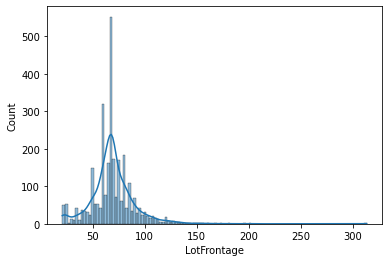

In [ ]:
AutoFix("LotFrontage").draw()

In [ ]:
AutoFix("LotFrontage").min()

tq


調整後的LotFrontage偏度(Skewness): -0.31, 峰度(Kurtosis): 3.1


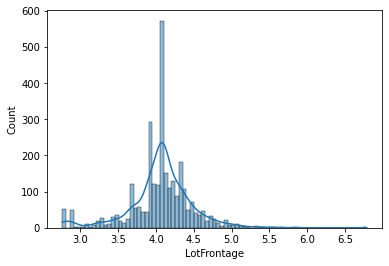

In [ ]:
AutoFix("LotFrontage").tq()

## 處理LotArea

偏度(Skewness): 12.83, 峰度(Kurtosis): 264.95


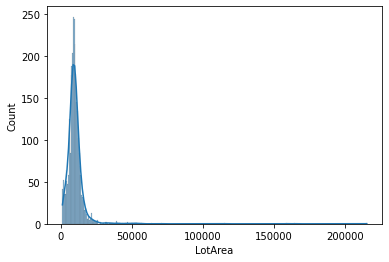

In [ ]:
AutoFix("LotArea").draw()

In [ ]:
AutoFix("LotArea").min()

log


調整後的LotArea偏度(Skewness): -0.51, 峰度(Kurtosis): 3.75


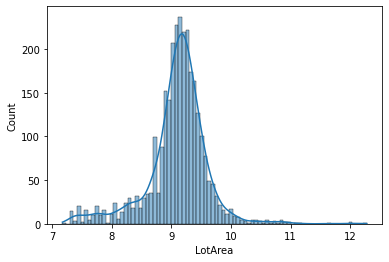

In [ ]:
AutoFix("LotArea").log()

## 處理MasVnrArea

偏度(Skewness): 2.61, 峰度(Kurtosis): 9.34


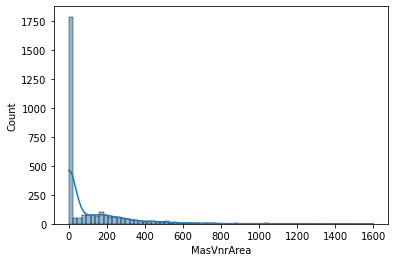

In [ ]:
AutoFix("MasVnrArea").draw()

In [ ]:
AutoFix("MasVnrArea").min()

sq


調整後的MasVnrArea偏度(Skewness): 1.07, 峰度(Kurtosis): 0.05


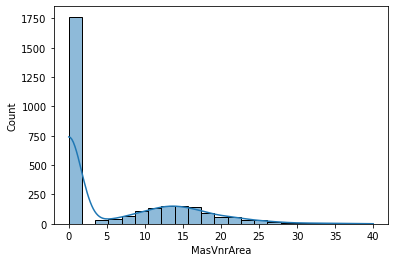

In [ ]:
AutoFix("MasVnrArea").sq()

## 處理BsmtFinSF1

偏度(Skewness): 1.43, 峰度(Kurtosis): 6.91


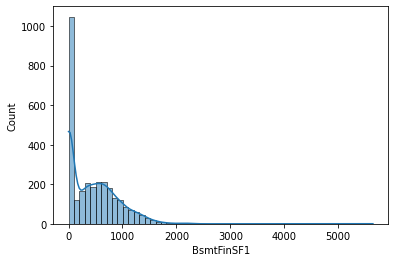

In [ ]:
AutoFix("BsmtFinSF1").draw()

In [ ]:
AutoFix("BsmtFinSF1").min()

sq


調整後的BsmtFinSF1偏度(Skewness): -0.01, 峰度(Kurtosis): -1.21


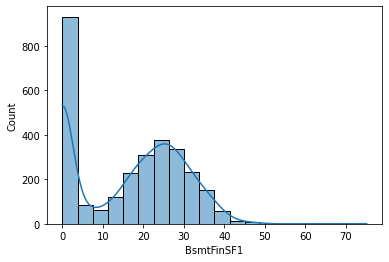

In [ ]:
AutoFix("BsmtFinSF1").sq()

## 處理BsmtFinSF2

偏度(Skewness): 4.15, 峰度(Kurtosis): 18.84


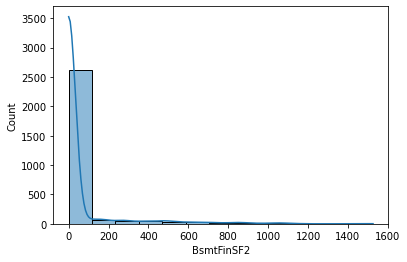

In [ ]:
AutoFix("BsmtFinSF2").draw()

In [ ]:
AutoFix("BsmtFinSF2").min()

tq


調整後的BsmtFinSF2偏度(Skewness): 2.68, 峰度(Kurtosis): 5.73


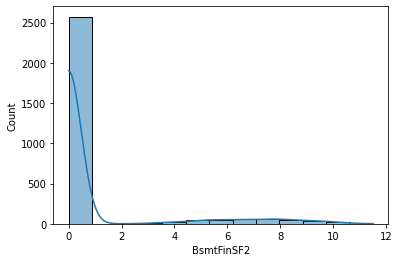

In [ ]:
AutoFix("BsmtFinSF2").tq()

## 處理BsmtUnfSF

偏度(Skewness): 0.92, 峰度(Kurtosis): 0.4


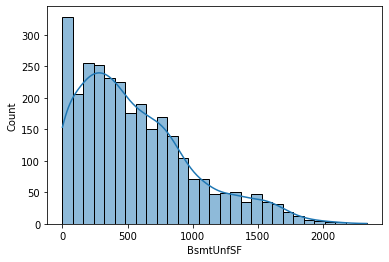

In [ ]:
AutoFix("BsmtUnfSF").draw()

In [ ]:
AutoFix("BsmtUnfSF").min()

sq


調整後的BsmtUnfSF偏度(Skewness): -0.24, 峰度(Kurtosis): -0.29


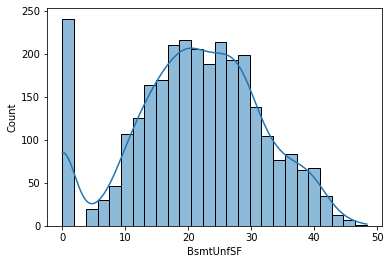

In [ ]:
AutoFix("BsmtUnfSF").sq()

## 處理TotalBsmtSF

偏度(Skewness): 1.16, 峰度(Kurtosis): 9.16


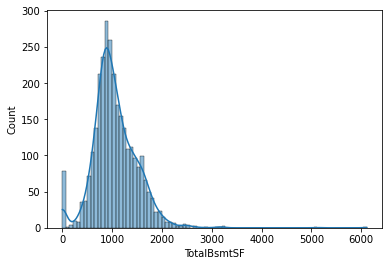

In [ ]:
AutoFix("TotalBsmtSF").draw()

In [ ]:
AutoFix("TotalBsmtSF").min()

sq


調整後的TotalBsmtSF偏度(Skewness): -1.31, 峰度(Kurtosis): 5.58


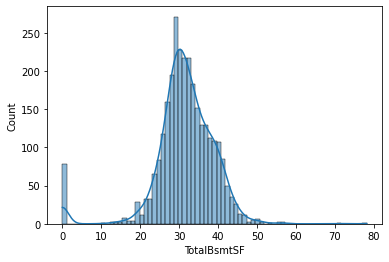

In [ ]:
AutoFix("TotalBsmtSF").sq()

## 處理1stFlrSF

偏度(Skewness): 1.47, 峰度(Kurtosis): 6.96


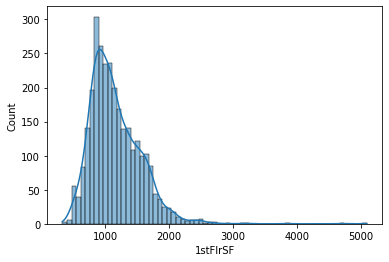

In [ ]:
AutoFix("1stFlrSF").draw()

In [ ]:
AutoFix("1stFlrSF").min()

bc


調整後的1stFlrSF偏度(Skewness): -0.0, 峰度(Kurtosis): 0.13


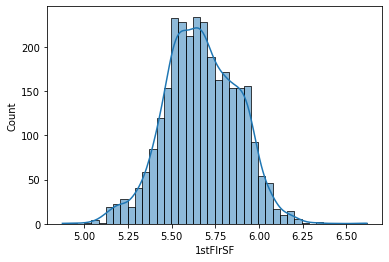

In [ ]:
AutoFix("1stFlrSF").bc()

## 處理2ndFlrSF

偏度(Skewness): 0.86, 峰度(Kurtosis): -0.42


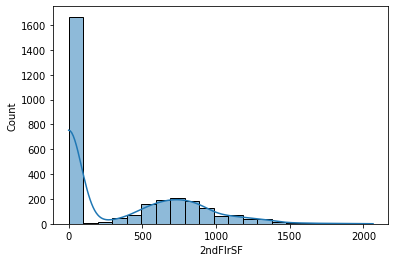

In [ ]:
AutoFix("2ndFlrSF").draw()

In [ ]:
AutoFix("2ndFlrSF").min()

sq


調整後的2ndFlrSF偏度(Skewness): 0.45, 峰度(Kurtosis): -1.6


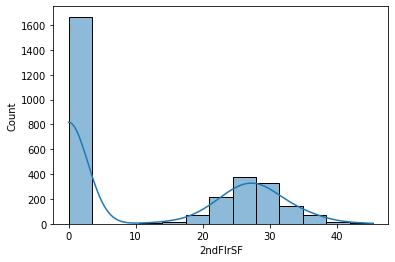

In [ ]:
AutoFix("2ndFlrSF").sq()

## 處理LowQualFinSF

偏度(Skewness): 12.09, 峰度(Kurtosis): 174.93


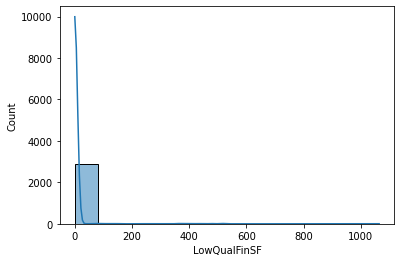

In [ ]:
AutoFix("LowQualFinSF").draw()

In [ ]:
AutoFix("LowQualFinSF").min()

tq


調整後的LowQualFinSF偏度(Skewness): 8.94, 峰度(Kurtosis): 80.71


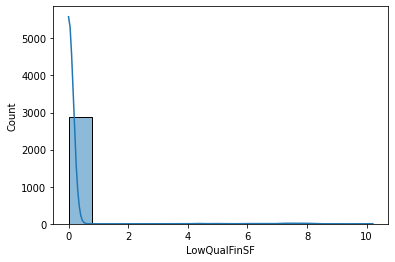

In [ ]:
AutoFix("LowQualFinSF").tq()

## 處理GrLivArea

偏度(Skewness): 1.27, 峰度(Kurtosis): 4.12


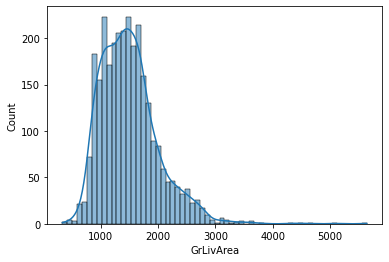

In [ ]:
AutoFix("GrLivArea").draw()

In [ ]:
AutoFix("GrLivArea").min()

bc


調整後的GrLivArea偏度(Skewness): -0.0, 峰度(Kurtosis): 0.21


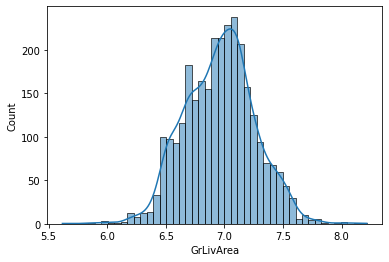

In [ ]:
AutoFix("GrLivArea").bc()

## GarageArea不處理

偏度(Skewness): 0.24, 峰度(Kurtosis): 0.94


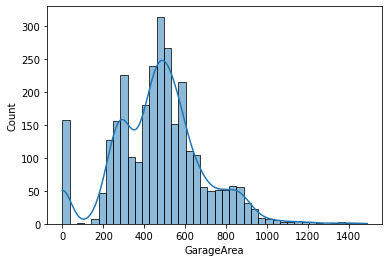

In [ ]:
AutoFix("GarageArea").draw()

## 處理WoodDeckSF

偏度(Skewness): 1.84, 峰度(Kurtosis): 6.74


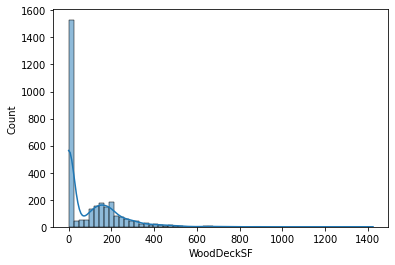

In [ ]:
AutoFix("WoodDeckSF").draw()

In [ ]:
AutoFix("WoodDeckSF").min()

sq


調整後的WoodDeckSF偏度(Skewness): 0.51, 峰度(Kurtosis): -1.12


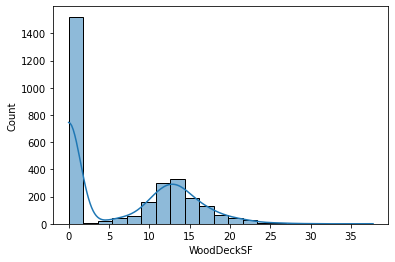

In [ ]:
AutoFix("WoodDeckSF").sq()

## 處理OpenPorchSF

偏度(Skewness): 2.54, 峰度(Kurtosis): 10.94


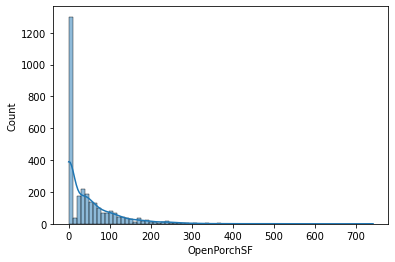

In [ ]:
AutoFix("OpenPorchSF").draw()

In [ ]:
AutoFix("OpenPorchSF").min()

sq


調整後的OpenPorchSF偏度(Skewness): 0.6, 峰度(Kurtosis): -0.46


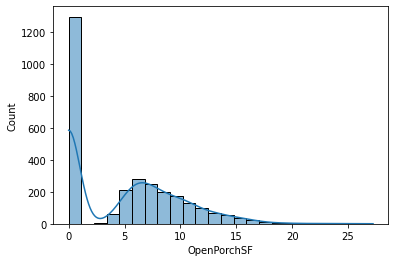

In [ ]:
AutoFix("OpenPorchSF").sq()

## 處理EnclosedPorch

偏度(Skewness): 4.01, 峰度(Kurtosis): 28.38


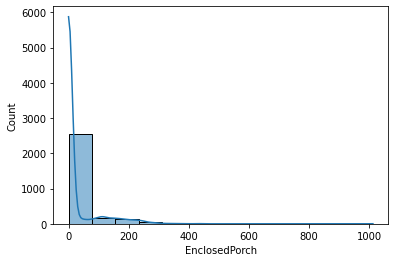

In [ ]:
AutoFix("EnclosedPorch").draw()

In [ ]:
AutoFix("EnclosedPorch").min()

tq


調整後的EnclosedPorch偏度(Skewness): 2.07, 峰度(Kurtosis): 2.63


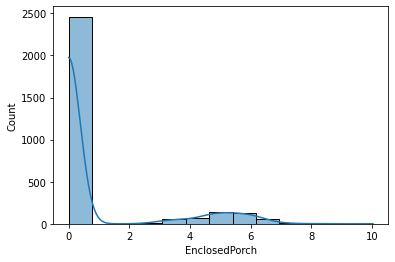

In [ ]:
AutoFix("EnclosedPorch").tq()

## 處理3SsnPorch

偏度(Skewness): 11.38, 峰度(Kurtosis): 149.41


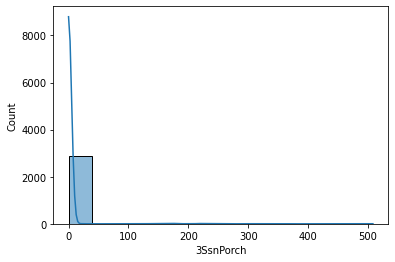

In [ ]:
AutoFix("3SsnPorch").draw()

In [ ]:
AutoFix("3SsnPorch").min()

tq


調整後的3SsnPorch偏度(Skewness): 9.02, 峰度(Kurtosis): 81.11


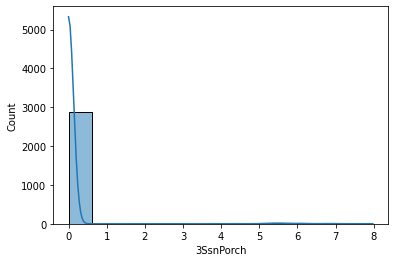

In [ ]:
AutoFix("3SsnPorch").tq()

## 處理ScreenPorch

偏度(Skewness): 3.95, 峰度(Kurtosis): 17.78


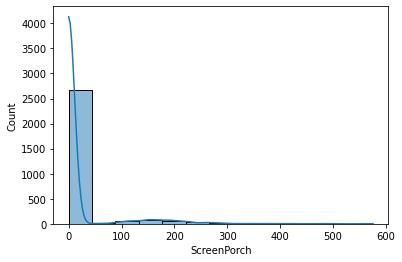

In [ ]:
AutoFix("ScreenPorch").draw()

In [ ]:
AutoFix("ScreenPorch").min()

tq


調整後的ScreenPorch偏度(Skewness): 3.01, 峰度(Kurtosis): 7.31


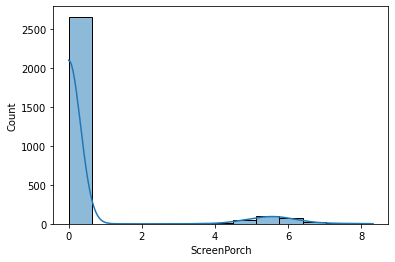

In [ ]:
AutoFix("ScreenPorch").tq()

## 處理PoolArea

偏度(Skewness): 16.91, 峰度(Kurtosis): 298.63


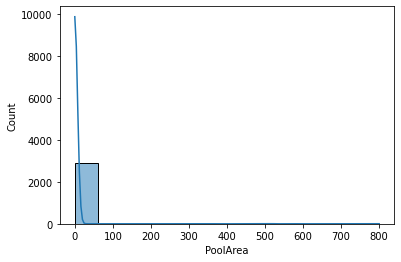

In [ ]:
AutoFix("PoolArea").draw()

In [ ]:
AutoFix("PoolArea").min()

tq


調整後的PoolArea偏度(Skewness): 15.27, 峰度(Kurtosis): 234.12


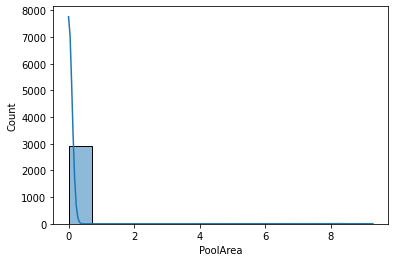

In [ ]:
AutoFix("PoolArea").tq()

## 處理MiscVal

偏度(Skewness): 21.96, 峰度(Kurtosis): 564.07


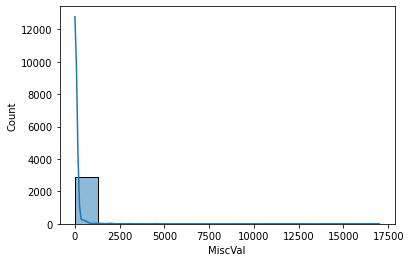

In [ ]:
AutoFix("MiscVal").draw()

In [ ]:
AutoFix("MiscVal").min()

tq


調整後的MiscVal偏度(Skewness): 6.62, 峰度(Kurtosis): 52.16


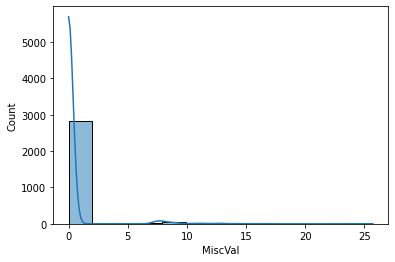

In [ ]:
AutoFix("MiscVal").tq()

## 使用Zscore正規化

In [ ]:
zscore_list = [
          "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
          "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
          "GrLivArea", "GarageArea", "WoodDeckSF","OpenPorchSF", "EnclosedPorch",	
          "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"
        ]

In [ ]:
from sklearn import preprocessing

def AutoZ(list_name):
  
  # 建立StandardScaler物件
  zscore = preprocessing.StandardScaler()

  for i in range(len(list_name)):

    values = alldf[list_name[i]].values
    values = values.reshape(len(values), 1)

    alldf[list_name[i]] = zscore.fit_transform(values)

In [ ]:
AutoZ(zscore_list)

# 有程度區分的類別資料做Label Encoding

## MSSubClass、OverallQual、OverallCond不處理

## 處理Utilities

In [ ]:
# le函式

def le(ori, f_list):

  chg = [i for i in range(len(ori))]

  for f in f_list:

    alldf[f].replace(ori, chg, inplace=True)

In [ ]:
ori = ["NoSeWa", "AllPub"]
f_list = ["Utilities"]

le(ori, f_list)

## 處理ExterQual、ExterCond、HeatingQC、KitchenQual

In [ ]:
ori = ["Po", "Fa", "TA", "Gd", "Ex"]
f_list = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual"]

le(ori, f_list)

## 處理BsmtQual、BsmtCond

In [ ]:
ori = ["NoBsmt", "Po", "Fa", "TA", "Gd", "Ex"]
f_list = ["BsmtQual", "BsmtCond"]

le(ori, f_list)

## 處理FireplaceQu

In [ ]:
ori = ["NoFireplace", "Po", "Fa", "TA", "Gd", "Ex"]
f_list = ["FireplaceQu"]

le(ori, f_list)

## 處理GarageQual、GarageCond

In [ ]:
ori = ["NoGarage", "Po", "Fa", "TA", "Gd", "Ex"]
f_list = ["GarageQual", "GarageCond"]

le(ori, f_list)

## 處理BsmtExposure

In [ ]:
ori = ["NoBsmt", "No", "Mn", "Av", "Gd"]
f_list = ["BsmtExposure"]

le(ori, f_list)

In [ ]:
alldf["BsmtExposure"].value_counts()

1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

## 處理BsmtFinType1

In [ ]:
ori = ["NoBsmt", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
f_list = ["BsmtFinType1"]

le(ori, f_list)

In [ ]:
alldf["BsmtFinType1"].value_counts()

1    851
6    849
5    429
3    288
4    269
2    154
0     79
Name: BsmtFinType1, dtype: int64

## 處理BsmtFinType2

In [ ]:
ori = ["NoBsmt", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
f_list = ["BsmtFinType2"]

le(ori, f_list)

In [ ]:
alldf["BsmtFinType2"].value_counts()

1    2493
3     105
2      87
0      80
4      68
5      52
6      34
Name: BsmtFinType2, dtype: int64

## 處理Electrical

In [ ]:
ori = ["Mix", "FuseP", "FuseF", "FuseA", "SBrkr"]
f_list = ["Electrical"]

le(ori, f_list)

In [ ]:
alldf["Electrical"].value_counts()

4    2672
3     188
2      50
1       8
0       1
Name: Electrical, dtype: int64

## 處理Functional

In [ ]:
ori = ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"]
f_list = ["Functional"]

le(ori, f_list)

In [ ]:
alldf["Functional"].value_counts()

7    2719
5      70
6      65
4      35
3      19
2       9
1       2
Name: Functional, dtype: int64

## 處理GarageFinish

In [ ]:
ori = ["NoGarage", "Unf", "RFn", "Fin"]
f_list = ["GarageFinish"]

le(ori, f_list)

In [ ]:
alldf["GarageFinish"].value_counts()

1    1230
2     811
3     719
0     159
Name: GarageFinish, dtype: int64

## 處理PoolQC

In [ ]:
ori = ["NoPool", "Fa", "TA", "Gd", "Ex"]
f_list = ["PoolQC"]

le(ori, f_list)

In [ ]:
alldf["PoolQC"].value_counts()

0    2909
4       4
3       4
1       2
Name: PoolQC, dtype: int64

## 處理Fence

In [ ]:
ori = ["NoFence", "MnWw", "GdWo", "MnPrv", "GdPrv"]
f_list = ["Fence"]

le(ori, f_list)

In [ ]:
alldf["Fence"].value_counts()

0    2348
3     329
4     118
2     112
1      12
Name: Fence, dtype: int64

# 處理沒有程度區分的類別資料

In [ ]:
"""
【使用OHE】
Condition1, Condition2 有一樣的值，可能要合併
Exterior1st, Exterior2nd 有一樣的值，可能要合併
MoSold 銷售月份1~12
YrSold(2006~2010)

【使用Bucketing(桶分類)】
YearBuilt(1872~2010) YearRemodAdd(1950~2010) GarageYrBlt(1895~2010)

桶分類 https://hackmd.io/@Zero871015/pythonNote-2#Bucketing%E6%A1%B6%E5%88%86%E9%A1%9E
"""

'\n【使用OHE】\nCondition1, Condition2 有一樣的值，可能要合併\nExterior1st, Exterior2nd 有一樣的值，可能要合併\nMoSold 銷售月份1~12\nYrSold(2006~2010)\n\n【使用Bucketing(桶分類)】\nYearBuilt(1872~2010) YearRemodAdd(1950~2010) GarageYrBlt(1895~2010)\n\n桶分類 https://hackmd.io/@Zero871015/pythonNote-2#Bucketing%E6%A1%B6%E5%88%86%E9%A1%9E\n'

In [ ]:
# 未改建(YearRemodAdd)數量為1560個

c = 0
for i in range(len(alldf)):
  if alldf["YearBuilt"][i] == alldf["YearRemodAdd"][i]:
    c += 1

c

1560

## 使用OHE處理"MSZoning", "Street", "Alley", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "MasVnrType", "Foundation", "Heating", "CentralAir", "GarageType", "PavedDrive", "MiscFeature", "SaleType", "SaleCondition", "Condition1", "Condition2", "Exterior1st", "Exterior2nd", "MoSold", "YrSold"

In [ ]:
alldf["YrSold"] = alldf["YrSold"].astype(str)

In [ ]:
alldf["MoSold"] = alldf["MoSold"].astype(str)

In [ ]:
alldf_dum = pd.get_dummies(alldf[["MSZoning", "Street", "Alley", "LotShape", "LandContour", 
                  "LotConfig", "LandSlope", "Neighborhood", "BldgType", "HouseStyle", 
                  "RoofStyle", "RoofMatl", "MasVnrType", "Foundation", "Heating", 
                  "CentralAir", "GarageType", "PavedDrive", "MiscFeature", "SaleType", 
                  "SaleCondition", "Condition1", "Condition2", "Exterior1st", "Exterior2nd", 
                  "MoSold", "YrSold"]])

In [ ]:
alldf = pd.concat([alldf, alldf_dum], axis = 1)

In [ ]:
alldf = alldf.drop(["MSZoning", "Street", "Alley", "LotShape", "LandContour", 
          "LotConfig", "LandSlope", "Neighborhood", "BldgType", "HouseStyle", 
          "RoofStyle", "RoofMatl", "MasVnrType", "Foundation", "Heating", 
          "CentralAir", "GarageType", "PavedDrive", "MiscFeature", "SaleType", 
          "SaleCondition", "Condition1", "Condition2", "Exterior1st", "Exterior2nd", 
          "MoSold", "YrSold"], axis = 1)

## 使用桶分類處理"YearBuilt", "YearRemodAdd", "GarageYrBlt"

In [ ]:
# 將GarageYrBlt的資料由小數改為整數

alldf["GarageYrBlt"] = alldf["GarageYrBlt"].astype(int)

In [ ]:
# 修改誤植資料

for i in range(len(alldf)):
  if alldf["GarageYrBlt"][i] == 2207:
    # print(alldf.iloc[i])
    alldf.at[i, "GarageYrBlt"] = 2007

In [ ]:
bins = [i for i in range(1870, 2020, 10)]
labels = [str(i) + "s" for i in range(1870, 2010, 10)]

In [ ]:
# 使用pd.cut將年切分為14等份

yrlist = ["YearBuilt", "YearRemodAdd", "GarageYrBlt"]

for i in yrlist:
  alldf[i] = pd.cut(
                alldf[i], 
                bins = bins, 
                labels = labels, 
                include_lowest = True
                )

In [ ]:
alldf_dum = pd.get_dummies(alldf[yrlist])

In [ ]:
alldf = pd.concat([alldf, alldf_dum], axis = 1)

In [ ]:
alldf = alldf.drop(yrlist, axis = 1)

# 建立模型

## 訓練資料

In [ ]:
# 訓練資料題目

x = alldf.iloc[:len(traindf)]
x = np.array(x)

In [ ]:
# 訓練資料答案

y = traindf["SalePrice"]
y = np.array(y)

## 驗證資料

In [ ]:
# 驗證資料題目

x_pred = alldf.iloc[len(traindf):]
x_pred = np.array(x_pred)

## 模型

## RandomForestRegressor

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# reg = RandomForestRegressor()

# params = {
#     "max_depth": range(3, 10),
#     "n_estimators": range(11, 150, 2)
#       }

# search = GridSearchCV(
#               reg, 
#               params, 
#               cv = 10, 
#               n_jobs = -1
#             )

# search.fit(x,y)

# print(f"最佳分數: {search.best_score_}, 最佳參數: {search.best_params_}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

reg = RandomForestRegressor(max_depth=9, n_estimators=145)  # 設置隨機森林模型
np.average(cross_val_score(reg, x, y, cv=10))  # 交叉驗證

0.8640980439535142

In [ ]:
# reg = search.best_estimator_

# # 預測驗證資料
# pre = reg.predict(x_pred)

# # 將預測結果做成表格
# res = pd.DataFrame({"Id": testdf["Id"], "SalePrice": pre})

# # res.to_csv("sub_230209.csv", encoding = "utf-8", index = False)

## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

reg = DecisionTreeRegressor()

params = {
    "max_depth":range(3, 50)
}
search = GridSearchCV(reg, params, cv=10, n_jobs=-1)
search.fit(x, y)

print(search.best_score_)
print(search.best_params_)

0.7786368494787297
{'max_depth': 9}


In [ ]:
from sklearn.model_selection import cross_val_score

reg = DecisionTreeRegressor(max_depth = 9)

scores = cross_val_score(reg, x, y, cv = 10, n_jobs = -1)

print(scores)
print(f"avg: {np.average(scores)}")

[0.76524442 0.77918264 0.7727775  0.73191739 0.84614608 0.81471529
 0.83332734 0.80656127 0.6725806  0.74344778]
avg: 0.7765900321284086


## Stacking

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor


estimators = [
    ('rf', RandomForestRegressor(random_state = 42)),
    ('svr', svm.SVR()),
    ('knn', KNeighborsRegressor()),
    ('dt', DecisionTreeRegressor(random_state = 42))
]
reg = StackingRegressor(
    estimators=estimators, final_estimator= MLPRegressor(activation = "relu", alpha = 0.1, hidden_layer_sizes = (8,8),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)
)

reg.fit(x, y)

reg.score(x, y)

0.9726780236773891

In [ ]:
# 預測驗證資料
pre = reg.predict(x_pred)

# 將預測結果做成表格
res = pd.DataFrame({"Id": testdf["Id"], "SalePrice": pre})

# res.to_csv("sub_230209_2.csv", encoding = "utf-8", index = False)

# 繼續



1.   補缺失值(數值，類別) OK
2.   查看數值特徵分佈，正規化處理 OK
3.   將類別轉one-hot OK
4.   處理其他特徵



In [ ]:
# for i in range(len(alldf)):
#   if alldf["MiscFeature"][i] == "TenC":
#     print(alldf.iloc[i])

# 略

In [ ]:
# # 將原本的偏度峰度與轉換後的做比較

# from scipy.stats import boxcox

# def fix(name):

#   ori_skew = alldf[name].skew()
#   ori_kurt = alldf[name].kurt()

#   skew_list, kurt_list = [], []

#   if ori_skew < 0:

#     # 次方轉換
#     pw = np.power(alldf[name], 2)

#     pw_skew = pw.skew()
#     pw_kurt = pw.kurt()

#     skew_list.append(pw_skew)
#     kurt_list.append(pw_kurt)

#     pw_dis = ((ori_skew - pw_skew) ** 2 + (ori_kurt - pw_kurt) ** 2) ** 0.5

#   else:
    
#     # 對數轉換
#     log = np.log(alldf[name])

#     log_skew = log.skew()
#     log_kurt = log.kurt()

#     skew_list.append(log_skew)
#     kurt_list.append(log_kurt)

#     # 平方根轉換
#     sq = alldf[name]**(1/2)

#     sq_skew = sq.skew()
#     sq_kurt = sq.kurt()

#     skew_list.append(sq_skew)
#     kurt_list.append(sq_kurt)

#     # 立方根轉換

#     tq = alldf[name]**(1/3)

#     tq_skew = tq.skew()
#     tq_kurt = tq.kurt()

#     skew_list.append(tq_skew)
#     kurt_list.append(tq_kurt)

#     # Box-Cox 轉換
#     bc, lam = boxcox(alldf[name])
#     bc = pd.DataFrame(bc, columns=[name])[name]

#     bc_skew = bc.skew()
#     bc_kurt = bc.kurt()

#     skew_list.append(bc_skew)
#     kurt_list.append(bc_kurt)

#     # print(skew_list)
#     # print(kurt_list)

#     trans_dict = {0: "log", 1: "sq", 2: "tq", 3: "bc"}

#     skew_loc = skew_list.index(min(skew_list))  # .index -> 找出list中值的位置
#     # print(trans_dict[skew_loc])

#     kurt_loc = kurt_list.index(min(kurt_list))  # .index -> 找出list中值的位置
#     # print(trans_dict[kurt_loc])

#   # 用距離公式找出最小值，做為選擇轉換法的依據

#   dis_list = []

#   log_dis = ((ori_skew - log_skew) ** 2 + (ori_kurt - log_kurt) ** 2) ** 0.5
#   dis_list.append(log_dis)

#   sq_dis = ((ori_skew - sq_skew) ** 2 + (ori_kurt - sq_kurt) ** 2) ** 0.5
#   dis_list.append(sq_dis)

#   tq_dis = ((ori_skew - tq_skew) ** 2 + (ori_kurt - tq_kurt) ** 2) ** 0.5
#   dis_list.append(tq_dis)
  
#   bc_dis = ((ori_skew - bc_skew) ** 2 + (ori_kurt - bc_kurt) ** 2) ** 0.5
#   dis_list.append(bc_dis)

#   # print(log_dis, sq_dis, tq_dis, bc_dis)
#   print(dis_list)

#   dis_loc = dis_list.index(min(dis_list))
#   print(trans_dict[dis_loc])

In [ ]:
# fix("LotFrontage")

# 各種偏度峰度轉換法

In [ ]:
# skewness = round(alldf["LotFrontage"].skew(), 2)  # 偏度
# kurtosis = round(alldf["LotFrontage"].kurt(), 2)  # 峰度
# print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# # 繪製分布圖
# sns.histplot(alldf["LotFrontage"], kde=True)

In [ ]:
# # 對數轉換

# transform_data = np.log(alldf["LotFrontage"])
# # skewness 與 kurtosis
# skewness = round(transform_data.skew(), 2)
# kurtosis = round(transform_data.kurt(), 2)
# print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# # 繪製分布圖
# sns.histplot(transform_data, kde=True)
# plt.show()

In [ ]:
# # 平方根轉換

# transform_data = alldf["LotFrontage"]**(1/2)
# # skewness 與 kurtosis
# skewness = round(transform_data.skew(), 2)
# kurtosis = round(transform_data.kurt(), 2)
# print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# # 繪製分布圖
# sns.histplot(transform_data, kde=True)
# plt.show()

In [ ]:
# # 立方根轉換

# transform_data = alldf["LotFrontage"]**(1/3)
# # skewness 與 kurtosis
# skewness = round(transform_data.skew(), 2)
# kurtosis = round(transform_data.kurt(), 2)
# print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# # 繪製分布圖
# sns.histplot(transform_data, kde=True)
# plt.show()

In [ ]:
# # Box-Cox轉換

# from scipy.stats import boxcox
# transform_data, lam = boxcox(alldf["LotFrontage"])
# transform_data = pd.DataFrame(transform_data, columns=["LotFrontage"])["LotFrontage"]
# # skewness 與 kurtosis
# skewness = round(transform_data.skew(), 2)
# kurtosis = round(transform_data.kurt(), 2)
# print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# # 繪製分布圖
# sns.histplot(transform_data, kde=True)
# plt.show()